In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
def load_boston_housing_data():
    """Load and preprocess the Boston Housing dataset from its original source."""
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

    # Normalize features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X = scaler_X.fit_transform(data)
    y = scaler_y.fit_transform(target.reshape(-1, 1))
    
    return X, y, scaler_y

# Load and preprocess data
X, y, scaler_y = load_boston_housing_data()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (323, 13)
Validation set shape: (81, 13)
Test set shape: (102, 13)


In [4]:
def create_model():
    """Creates an improved neural network model for housing price prediction."""
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(13,)),
        tf.keras.layers.BatchNormalization(),
        
        # First hidden layer
        tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),
        
        # Second hidden layer
        tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),
        
        # Third hidden layer
        tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.1),
        
        # Output layer
        tf.keras.layers.Dense(1)
    ])
    
    return model

# Create and compile model
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 13)                  │              52 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,109 (51.21 KB)

 Trainable params: 12,635 (49.36 KB)

 Non-trainable params: 474 (1.85 KB)

In [5]:
# Create TensorFlow datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=10,
        min_lr=0.00001,
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.1614 - mae: 1.0194 - val_loss: 2.0831 - val_mae: 0.5591 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4292 - mae: 0.7327 - val_loss: 2.0144 - val_mae: 0.5299 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3209 - mae: 0.6935 - val_loss: 1.9717 - val_mae: 0.5099 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2702 - mae: 0.6554 - val_loss: 1.8990 - val_mae: 0.4588 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2530 - mae: 0.6752 - val_loss: 1.8868 - val_mae: 0.4574 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9242 - mae: 0.5006 - val_loss: 1.9002 - val_mae: 0.4723 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0455 - mae: 0.5522 - val_loss: 1.8837 - val_mae: 0.4690 - learning_rate: 0.0010
Epoch 8/20

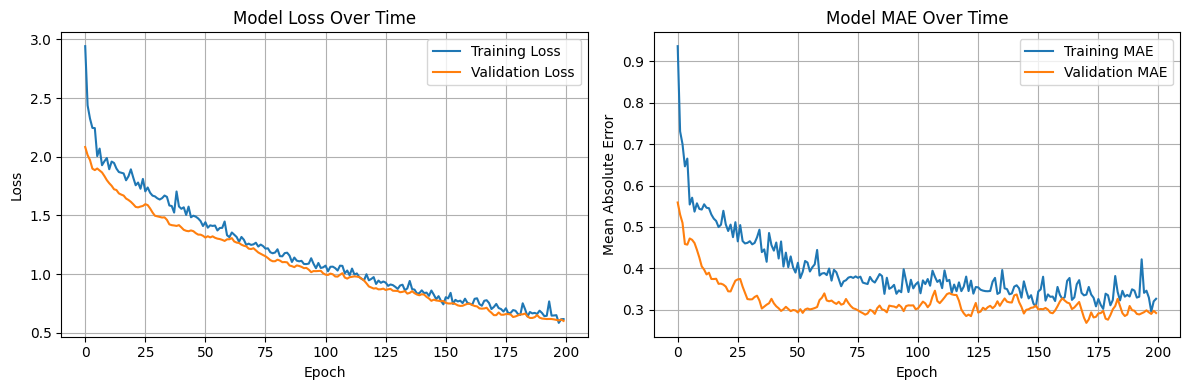

In [6]:
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Evaluate on test set
test_results = model.evaluate(test_dataset, verbose=0)
print(f"Test Mean Absolute Error (normalized): {test_results[1]:.4f}")

# Make predictions
test_predictions = model.predict(X_test)

# Convert predictions back to original scale
test_predictions_original = scaler_y.inverse_transform(test_predictions)
test_actual_original = scaler_y.inverse_transform(y_test)

# Calculate metrics in original scale
mae_original = np.mean(np.abs(test_predictions_original - test_actual_original))
mse = np.mean((test_predictions_original - test_actual_original) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((test_actual_original - test_predictions_original) ** 2) / 
          np.sum((test_actual_original - np.mean(test_actual_original)) ** 2))

print(f"\nTest Mean Absolute Error: ${mae_original:.2f}k")
print(f"Root Mean Square Error: ${rmse:.2f}k")
print(f"R-squared Score: {r2:.4f}")

# Show sample predictions
print("\nSample Predictions vs Actual Values (in $1000s):")
for pred, actual in zip(test_predictions_original[:5], test_actual_original[:5]):
    print(f"Predicted: ${pred[0]:.2f}k, Actual: ${actual[0]:.2f}k")

Test Mean Absolute Error (normalized): 0.2609
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Test Mean Absolute Error: $2.40k
Root Mean Square Error: $3.75k
R-squared Score: 0.8085

Sample Predictions vs Actual Values (in $1000s):
Predicted: $24.88k, Actual: $23.60k
Predicted: $33.44k, Actual: $32.40k
Predicted: $16.40k, Actual: $13.60k
Predicted: $23.25k, Actual: $22.80k
Predicted: $15.66k, Actual: $16.10k


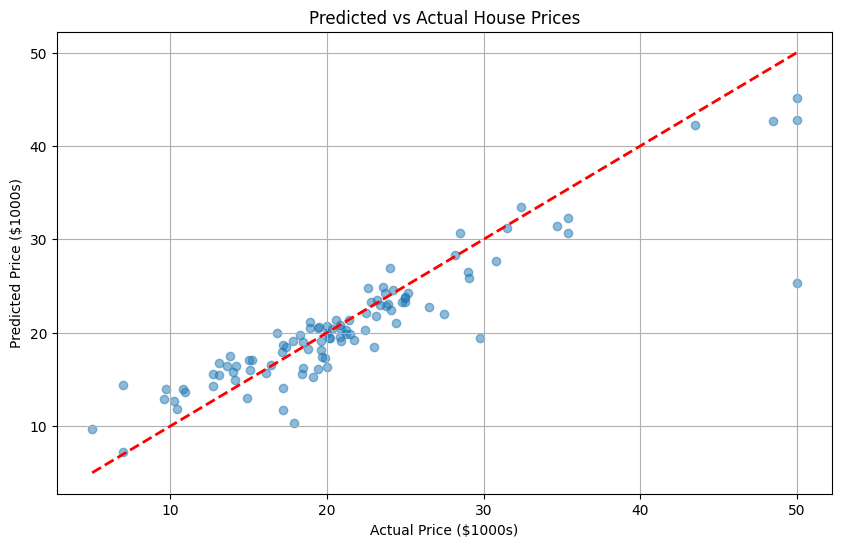

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(test_actual_original, test_predictions_original, alpha=0.5)
plt.plot([test_actual_original.min(), test_actual_original.max()],
         [test_actual_original.min(), test_actual_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Predicted vs Actual House Prices')
plt.grid(True)
plt.show()